{'bp_model': 3.659768581390381}
8/8 [==============================] - 0s 426us/step


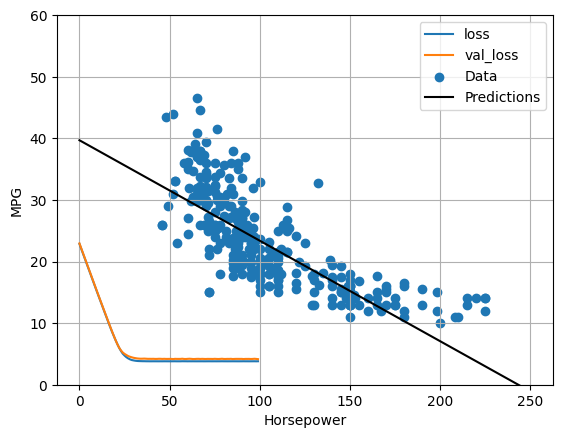

In [56]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

import matplotlib.pyplot as plt

import numpy as np
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import pandas as pd
import seaborn as sns

xFactor = 'Horsepower'
yFactor = 'MPG'

# data = pd.read_csv('input/diabetes.csv')
# column_names = np.array(data.columns)

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_data = pd.read_csv(url,
            names=column_names,
            na_values='?', comment='\t',
            sep=' ',skipinitialspace=True)


data = raw_data.copy()
data = data.dropna()
data['Origin'] = data['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
data = pd.get_dummies(data, columns=['Origin'], prefix='', prefix_sep='')

# Setup Training Data and Test Data sets
# ----------------------------------------
train_dataset = data.sample(frac=0.8, random_state=0)
test_dataset = data.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop(yFactor)
test_labels = test_features.pop(yFactor)

# Create Normalizers and build models
# -------------------------------------
bp = np.array(train_features[xFactor])
linear = np.array(train_features)
bp_normalizer = layers.Normalization(input_shape=[1,], axis=None)
normalizer = layers.Normalization(axis=-1)
bp_normalizer.adapt(bp)
# normalizer.adapt(linear)

bp_model = tf.keras.Sequential([
    bp_normalizer,
    layers.Dense(units=1)
])

# linear_model = tf.keras.Sequential([
#     normalizer,
#     layers.Dense(units=1)
# ])


# Compile and train, setting results to history
# ------------------------------------------------------
bp_model.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

# linear_model.compile(
#     optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.1),
#     loss='mean_absolute_error')


history = bp_model.fit(
    train_features[xFactor],
    train_labels,
    epochs=100,
    verbose=0,
    validation_split=0.2)

# Record and Plot Loss
# ----------------------
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 60])
    plt.xlabel('Epoch')
    plt.ylabel(f'Error [{xFactor}]')
    plt.legend()
    plt.grid(True)

plot_loss(history)

# Run the test data against the model
# -------------------------------------
test_results={}
test_results['bp_model'] = bp_model.evaluate(
    test_features[xFactor],
    test_labels, verbose=0)

# test_results['linear_model'] = linear_model.evaluate(
#     test_features, test_labels, verbose=0)

print(test_results)

# Graph the correlation and prediction
# -------------------------------------
x = tf.linspace(0.0,250,251)
y = bp_model.predict(x)

def plot_horsepower(x, y):
  plt.scatter(train_features[xFactor], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel(xFactor)
  plt.ylabel(yFactor)
  plt.legend()

plot_horsepower(x, y)

